# Assignment 7: Neural Networks using Keras and Tensorflow 

**Submitted by:** *Neha Devi Shakya 15h, Sarvesh Meenowa 15h*

Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [1]:
# imports
import itertools
import keras
import matplotlib.pyplot as plt
# set figure size and font size
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["font.size"] = 22
import numpy as np
import pandas as pd
import random
# set seed
random.seed(12345)
import tensorflow as tf

from __future__ import print_function
from keras import backend as K
from keras import utils as np_utils
from keras.datasets import mnist
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential

In [2]:
# Hyper-parameters data-loading and formatting
batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == "channels_first":
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [3]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)

## 1) 1 point. Preprocessing. 
In the notebook, the data is downloaded from an external server imported into the notebook environment using the mnist.load_data() function call.  
**Explain the data pre-processing high-lighted in the notebook.** 

First, a dataset of 60,000 greyscale images of the ten digits is downloaded along with a test set of 10,000 images.

```python
(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()
```

x_train and x_test contain a numerical representation of the number of pictures. One element is one pixel, and the value represents its grayscale level as a byte image - a value between 0 and 255 where 255 represents white, 0 represents black, and in-between values represent shades of grey.

```python
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
```

These first two lines of code convert all training and testing data from integers to floating-point numbers (float-32 type) as python's division assignment operator /= does not output float when the inputs are integers.

```python
x_train /= 255
x_test /= 255
```

After that, these two lines of code divide everything by the max-grayscale level (255) to get a value between 0 and 1 (normalize the values). Normalizing the data is very important, as it makes the input features have the same order of magnitude, making the training easier. (source: Module 7: Machine learning and neural networks, neural_network8_intro.ipynb)

```python
y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)
```

Then these last two lines of code create y-train and y-test variables, representing the correct value the image is displaying. The variables lbl_train and lbl_test are vectors with the corresponding correct integers. lbl_train = [5, 0, 4, ..., 5, 6, 8], meaning that the first number is a 5, the second is a 0, the third is 4, and so on. The method to_categorical then converts these integers to binary representations stored in y-train and y-test, i.e. converts a 1-D array of 60000 to an array of shape (60000, 10). The labels (correct integers) are converted into binary class matrices, meaning that the correct number is indicated by a 1 in the proper index instead of a number. For example the first y_train element: y_k = [0,0,0,0,0,5,0,0,0,0] represents the value 5 as index 5 is equal to 1.

In [5]:
## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(num_classes, activation = "softmax"))

model.compile(
        loss = keras.losses.categorical_crossentropy,
        optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1),
        metrics = ["accuracy"]
)

fit_info = model.fit(
        x_train, y_train,
        batch_size = batch_size,
        epochs = epochs,
        verbose = 1,
        validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose = 0)
print(f"Test loss: {score[0]}, Test accuracy {score[1]}")

Epoch 1/10
469/469 [==============================] - 6s 6ms/step - loss: 0.4843 - accuracy: 0.8599 - val_loss: 0.2702 - val_accuracy: 0.9177
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2239 - accuracy: 0.9349 - val_loss: 0.1843 - val_accuracy: 0.9470
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1709 - accuracy: 0.9500 - val_loss: 0.1593 - val_accuracy: 0.9521
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1398 - accuracy: 0.9588 - val_loss: 0.1334 - val_accuracy: 0.9611
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1188 - accuracy: 0.9651 - val_loss: 0.1180 - val_accuracy: 0.9634
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1038 - accuracy: 0.9696 - val_loss: 0.1168 - val_accuracy: 0.9629
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0916 - accuracy: 0.9727 - val_loss: 0.1042 - val_accuracy: 0.9683
Epoch 

## 2) 4 points. Network model, training, and changing hyper-parameters. 

### A) How many layers does the network in the notebook have? How many neurons does each layer  have? What activation functions and why are these appropriate for this application? What is the total number of parameters for the network? Why does the input and output layers have the dimensions they have? 

```python
## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(num_classes, activation="softmax"))
```

The layers created in these ines of code resulted in

- 1 input layer
- 2 hidden layers
- 1 output layer

In total: **`4`** layers.

Where

- Input layer (Flatten) has `28 * 28 = 1 * 784 = `**`784`** neurons (_converts input from a 28x28 array into a 1-D array of 1x784._)
- Hidden layer 1 (Dense) has `1 * 64 = `**`64`** neurons
- Hidden layer 2 (Dense) has `1 * 64 = `**`64`** neurons
- Output layer (Dense) has `1 * 10 = `**`10`** neurons

In total: `784 + 64 + 64 + 10 = `**`922`**

---

The application uses the ReLU activation function in the hidden layers and Softmax activation function in the output layer.

$\begin{aligned} 
ReLU: f(x) = \begin{cases}0\;\;x < 0 \\x\;\;x \geq 0\end{cases} = max(0,\;x)
\end{aligned}$

The **Rectified Linear Unit (ReLU)** function is a non-linear activation function that does not activate all neurons simultaneously, unlike other activation functions. If the output of the linear transformation is less than 0, the **ReLU function** deactivates the neurons, meaning that negative input values are converted to 0, and the neuron is not activated. When compared to the **Sigmoid** and **Tanh** functions, which use an exponent that is computationally slow when done frequently, the **ReLU function** is considerably more computationally efficient because only a small number of neurons are engaged.

Due to its linear, non-saturating quality, **ReLU** also speeds up the convergence of gradient descent towards the global minimum of the loss function. Because the gradient of **ReLU** is also very easy to compute compared to **Sigmoid**, this acceleration in convergence is true for both feedforward and backpropagation. Another advantage of **ReLU** is sparsity which occurs when x ≤ 0. Dense representations appear to be less useful than sparse representations. The more such units in a layer, the more sparse the representation becomes. On the other hand, **Sigmoid functions** are prone to producing non-zero values, resulting in dense representations.


$\begin{aligned} 
Softmax: f(x_i) = \frac{e^{x_i}}{\sum\nolimits_{j=1}^{num\_classes}e^{x_j}} 
\end{aligned}$

In contrast to other activation functions that yield a single output for a single input, **Softmax** generates multiple outputs from a single input array. Instead of a binary class solution, **Softmax** can be used to develop neural network models that can categorise more than two classes. **Softmax**, which calculates relative probabilities, is used over **Sigmoid**, whose probability values are independent, meaning the probability that the data point belongs to 1 class does not consider the other classes' probability.

The output layer's output dimension should be configured according to the model's predicted output, which for the handwritten digit problem can be one neuron per digit, i.e. a vector of 10 nodes. This layer's **Softmax** activation function provides a vector representing the probability distributions (0-1) of a list of possible outcomes (digits 0-9), allowing the neural network to output the digit with the highest probability value. **Softmax** is the only activation function recommended for the *categorical cross-entropy loss function* since it adjusts the output to fit the loss function's required properties. (It normalises input values into values between 0 and 1 and sums up to 1, which can be interpreted as the probability of the input value being in a specific class.)

---

The parameters in the network is the sum of the weights and biases.

The total number of weights (the number of connections between the neurons) are: ($\Sigma\;neurons\;in\;currrent\;layer\;*\;neurons\;in\;previous\;layer$)

`784 * 64 + 64 * 64 + 64 * 10 = 54912`

The total number of biases (the number of nodes) are: ($\Sigma\;neurons\;in\;currrent\;layer$)

`64 + 64 + 10 = 138`

In total, the network has `54912 + 138 = `**`55050`** parameters.

We can verify this by using the `summary()` method that is available for keras-models.

In [6]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


### B) What loss-function is used to train the network? What is the functional form (mathematical expression) of the loss function? and how should we interpret it? Why is it appropriate for the problem at hand?

```python
model.compile(
        loss=keras.losses.categorical_crossentropy,
        optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=["accuracy"]
)
```

From this line of code we can see that the **catergorical cross-entropy loss function** is used to train the network, which is an optimization function used in the case of training a classification model. This function classifies the data by predicting the probabilities of which class the data belongs to. The functional form (mathematical expression) of the loss function is:

$$\mathrm{Loss} = -\sum_{i=1}^{output \atop size} y_i \cdot \mathrm{log}\; {\hat{y_i}}$$

where ***$\hat{y_i}$*** is the ith scalar value in the model output (predicted result), ***$y_i$***​ is the corresponding target value (correct result), and the output size is the number of scalar values in the model output. Here ***${\hat{y_i}}$*** will only be 1 for one index in the ***${\hat{y}}$*** vector and 0 for every other number. Thus the loss will only be affected by the prediction corresponding to the actual number it represents, as all other predictions will be multiplied by 0, meaning only the loss of the probability of the actual correct integer is considered and minimised.

This loss is a good measure of how distinguishable two discrete probability distributions are from each other. In this context, $y_i$​​ is the probability that event i occurs, and the sum of all $y_i$​​ is 1, meaning that precisely one event may occur. The minus sign ensures that the loss gets smaller when the distributions get closer.

The **categorical cross-entropy loss function** is appropriate because this is a multi-class classification model and the model utilizes **softmax** as an activation function with multiple output labels. All other possibilities are erroneous, and only one option (represented by a 1 in the vector) is correct (represented by a 0). The many numbers that the graphic represents are the options. It also works nicely with Softmax since it ensures the input for the log function is a positive value. In other words, when there is only one correct result (class) and several erroneous results, it is clear that each number can only belong to one class.

### C) Train the network for 10 epochs and plot the training and validation accuracy for each epoch.

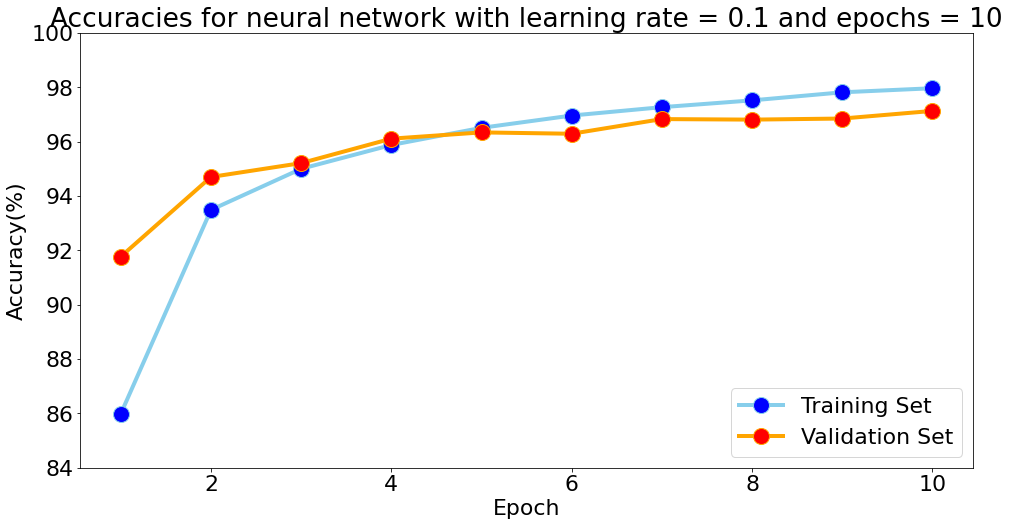

In [7]:
# Plot a line chart for training set accuracy
plt.plot(
    list(range(1, epochs + 1)), 
    [acc * 100 for acc in fit_info.history["accuracy"]],
    color = "skyblue", 
    marker = "o", 
    markerfacecolor = "blue", 
    markersize = 16, 
    linewidth = 4
)

# Plot a line chart for validation set accuracy
plt.plot(
    list(range(1, epochs+1)), 
    [acc * 100 for acc in fit_info.history["val_accuracy"]],
    color = "orange", 
    marker = "o", 
    markerfacecolor = "red", 
    markersize = 16, 
    linewidth = 4
)

# add plot title
plt.title("Accuracies for neural network with \nlearning rate = 0.1 and epochs = 10")


# fix y-ticks
min_acc = min(fit_info.history["accuracy"])
start_acc = 0.02 * (min_acc // 0.02)
yticks = np.arange(start_acc, 1.01, 0.02) * 100
plt.yticks(yticks)

# add legend and labels
plt.legend(["Training Set", "Validation Set"], loc = "lower right")
plt.xlabel("Epoch")
plt.ylabel("Accuracy(%)")

# show the plot
plt.show()

### D) Update model to implement a three-layer neural network where the hidden-layers has 500 and 300 hidden units respectively. Train for 40 epochs. What is the best validation accuracy you can achieve? – Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reach a validation accuracy of 0.9847 (<http://yann.lecun.com/exdb/mnist/>) using **weight decay** (L2 regularization of weights (kernels): <https://keras.io/api/layers/regularizers/>). Implement weight decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001. Train 3 replicates networks for each regularization factor. Plot the final validation accuracy with standard deviation (computed from the replicates) as a function of the regularization factor. How close do you get to Hintons result? – If you do not get the same results, what factors may influence this? (hint: What information is not given by Hinton on the MNIST database that may influence Model training) 

In [8]:
# This code block took almost 90 mins to run so we decided to save the scores into a csv file.

# epochs = 40
# regularization_factors = np.linspace(0.000001, 0.001, 5)
# scores = []

# def train_model(rf: float):
# 	## Define model ##
# 	model = Sequential()
# 	model.add(Flatten())
# 	model.add(Dense(500, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(rf)))
# 	model.add(Dense(300, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(rf)))
# 	model.add(Dense(num_classes, activation = 'softmax'))
	
# 	model.compile(
# 		loss = keras.losses.categorical_crossentropy,
# 		optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1),
# 		metrics = ["accuracy"]
# 	)

# 	fit_info = model.fit(
# 		x_train,
# 		y_train,
# 		batch_size = batch_size,
# 		epochs = epochs,
# 		verbose = 0,
# 		validation_data = (x_test, y_test)
# 	)
	
# 	return model.evaluate(x_test, y_test, verbose = 0)

# # 5 different regularization factors to train on
# # 3 replicates per regularization factor
# for rf, _ in itertools.product(regularization_factors, range(3)):
# 	scores.append(train_model(rf))

In [9]:
# # Saving the scores for the 15 trainings
# pd.DataFrame(scores, columns = ["loss", "accuracy"]).to_csv("scores.csv")

In [10]:
# Reading the saved scores-data
scores_df = pd.read_csv("scores.csv")

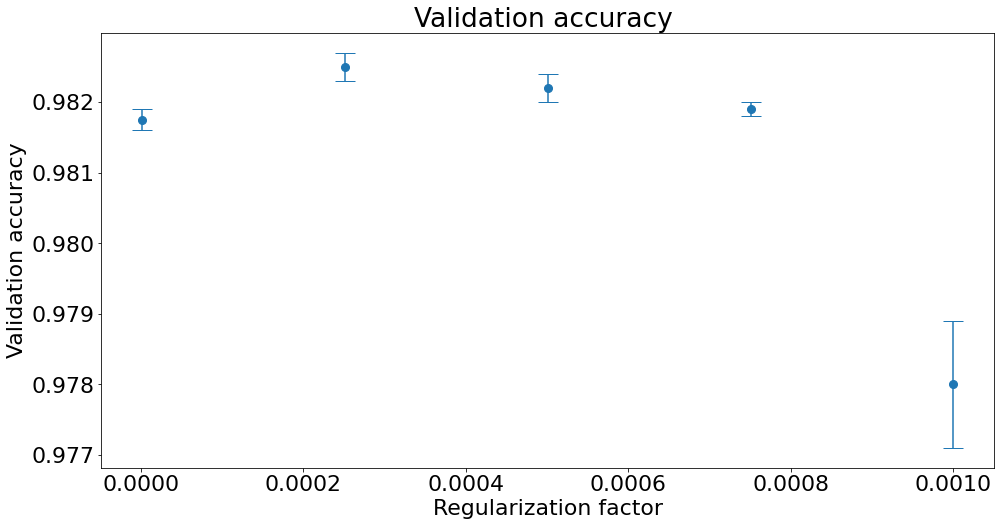

Our maximum validation accuracy:  0.9828
Hilton validation accuracy:  0.9847
The difference between our validation accuracy from Hilton:  0.0019


In [11]:
losses = scores_df["loss"]
accuracies = scores_df["accuracy"]

regularization_factors = np.linspace(0.000001, 0.001, 5)

mean_acc = []
std_acc = []
for start in range(0, 15, 3):
    stop = start + 2
    mean_acc.append(np.mean(accuracies[start:stop]))
    std_acc.append(np.std(accuracies[start:stop]))

plt.scatter(regularization_factors, mean_acc)
plt.xlabel("Regularization factor")
plt.ylabel("Validation accuracy")
plt.title("Validation accuracy ")

plt.errorbar(regularization_factors, mean_acc, std_acc, fmt = 'o', markersize = 8, capsize = 10)
plt.show()

print("Our maximum validation accuracy: ", round(np.max(accuracies), 5))
print("Hilton validation accuracy: ", 0.9847)
print("The difference between our validation accuracy from Hilton: ", round(0.9847 - np.max(accuracies), 5))

## 3) 2 points. Convolutional layers. 

### A) Design a model that makes use of at least one convolutional layer – how performant a model can you get? -- According to the MNIST database it should be possible reach to 99% accuracy on the validation data. If you choose to use any layers apart from convolutional layers and layers that you used in previous questions, you must describe what they do. If you do not reach 99% accuracy, report your best performance and explain your attempts and thought process.

We have included the code of only the best performing model.

In [13]:
## Define model ##
model = Sequential()

# add convolutional layer with 32 convolution filters used each of size 3x3
model.add(Conv2D(
        32, 
        kernel_size = (3, 3), 
        activation = 'relu', 
        input_shape = input_shape))

# add convolutional layer  with 64 convolution filters used each of size 3x3
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))

# add max pooling layer to downsize input
model.add(MaxPooling2D(pool_size = (2, 2)))

# add dropout layer to help prevent overfitting
model.add(Dropout(0.5))

# add flatten layer to decrease the dimensions
model.add(Flatten())

# add dense layer to get fully connected and get all the relevant data
model.add(Dense(128, activation = 'relu'))

# add dropout layer
model.add(Dropout(0.5))

# add output layer with softmax to get probabilities
model.add(Dense(num_classes, activation = 'softmax'))

# add the loss-function and compile
model.compile(
        loss = keras.losses.categorical_crossentropy,
        optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1),
        metrics = ["accuracy"]
)

epochs = 10
fit_info = model.fit(
        x_train, y_train,
        batch_size = batch_size,
        epochs = epochs,
        verbose = 1,
        validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 0)

print(f"Test loss: {score[0]}, Test accuracy {score[1]}")

# save the model to use in question 4C.
model.save("models/best_model_3")

Epoch 1/10
469/469 [==============================] - 123s 259ms/step - loss: 0.4729 - accuracy: 0.8520 - val_loss: 0.1152 - val_accuracy: 0.9645
Epoch 2/10
469/469 [==============================] - 113s 241ms/step - loss: 0.1726 - accuracy: 0.9480 - val_loss: 0.0697 - val_accuracy: 0.9792
Epoch 3/10
469/469 [==============================] - 128s 274ms/step - loss: 0.1272 - accuracy: 0.9621 - val_loss: 0.0555 - val_accuracy: 0.9816
Epoch 4/10
469/469 [==============================] - 101s 215ms/step - loss: 0.1017 - accuracy: 0.9691 - val_loss: 0.0427 - val_accuracy: 0.9858
Epoch 5/10
469/469 [==============================] - 103s 220ms/step - loss: 0.0888 - accuracy: 0.9733 - val_loss: 0.0408 - val_accuracy: 0.9865
Epoch 6/10
469/469 [==============================] - 113s 241ms/step - loss: 0.0795 - accuracy: 0.9756 - val_loss: 0.0349 - val_accuracy: 0.9876
Epoch 7/10
469/469 [==============================] - 105s 224ms/step - loss: 0.0719 - accuracy: 0.9778 - val_loss: 0.0361 -

INFO:tensorflow:Assets written to: models/best_model_3\assets


INFO:tensorflow:Assets written to: models/best_model_3\assets


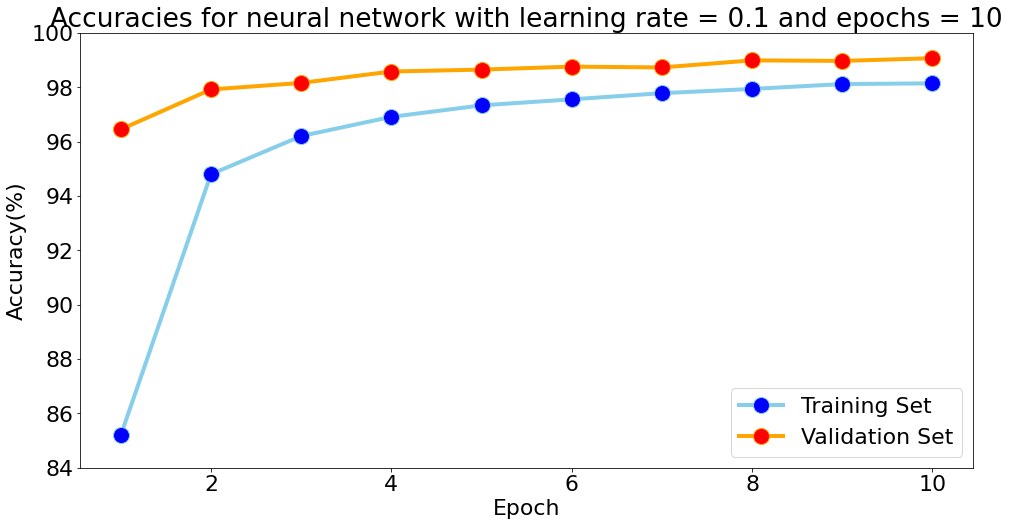

In [14]:
# Plot a line chart for training set accuracy
plt.plot(
    list(range(1, epochs + 1)), 
    [acc * 100 for acc in fit_info.history["accuracy"]],
    color = "skyblue", 
    marker = "o", 
    markerfacecolor = "blue", 
    markersize = 16, 
    linewidth = 4
)

# Plot a line chart for validation set accuracy
plt.plot(
    list(range(1, epochs+1)), 
    [acc * 100 for acc in fit_info.history["val_accuracy"]],
    color = "orange", 
    marker = "o", 
    markerfacecolor = "red", 
    markersize = 16, 
    linewidth = 4
)

# add plot title
plt.title("Accuracies for neural network with learning rate = 0.1 and epochs = 10")


# fix y-ticks
min_acc = min(fit_info.history["accuracy"])
start_acc = 0.02 * (min_acc // 0.02)
yticks = np.arange(start_acc, 1.01, 0.02) * 100
plt.yticks(yticks)

# add legend and labels
plt.legend(["Training Set", "Validation Set"], loc = "lower right")
plt.xlabel("Epoch")
plt.ylabel("Accuracy(%)")

# show the plot
plt.show()

The table below gives a rundown some of the CNNs we tested and their corresponding validation accuracy (We did not include all the tested CNNs)

|   Name    |   Classifier  |   Maximum Validation Accuracy [%] |
|-----------|---------------|-----------------------------------|
|   CNN1    |   conv2d_32, maxpooling2d, flatten, dense_128, dense_softmax  |   98.20%  |
|   CNN2    |   conv2d_32, conv2d_64, maxpooling2d, flatten, dense_128, dense_softmax   |   98.63%  |
|   CNN3    |   conv2d_32, maxpooling2d, conv2d_64, maxpooling2d, flatten, dense_softmax    |   98.03%  |
|   CNN4    |   conv2d_32, maxpooling2d, dropout_0.5, flatten, dense_128, dense_softmax |   98.58%  |
|   CNN5    |   conv2d_32, conv2d_64, maxpooling2d, dropout_0.5, flatten, dense_128, dense_softmax  |   98.93%  |
|   CNN6    |   conv2d_32, conv2d_64, maxpooling2d, dropout_0.5, flatten, dense_128, dropout_0.5, dense_softmax |   99.06%  |

The correct optimal approach may differ from the one we discovered, which might be determined by performing numerous replicates for the same CNN and averaging the results. Due to time constraints, we chose to use the best we could with only one replication.

We attempted different network construction approaches to achieve a high enough validation accuracy. All models used two dense layers, 1-2 convolutional layers and a max-pooling layer, but they also used 1-2 dropout layers in some cases.
- For the dense layer (non-output), we changed the number of neurons to 128.
- For the convolution layers, we tested both 32 and 64 filters of size 3x3.
- We supplied 2x2 as the kernel size for the max-pooling layer. We set the stride size equal to the kernel size. This layer looks in a 2x2 kernel and produces the maximum value for that range to downsample the data.
- The dropout layer deactivates specific neurons at random. The input parameter is the frequency of deactivated neurons, which we set as 0.5. This layer helps in avoiding overfitting by deactivating neurons.

The optimal approach we discovered can be further fine-tuned to get better results. Below we provide a summary of our process and results:
1. For the first approach, we added a convolution layer with 32 filters and a max-pooling layer, which resulted in a maximum validation accuracy of 98.20%.
2. We added a second convolution layer with 64 filters for the second approach, which resulted in an increased maximum validation accuracy of 98.63%.
3. We wanted to test a method described in a publication by Yann LeCun et al . on the convolutional network for image recognition of hand-written digits [http://www.iro.umontreal.ca/lisa/pointeurs/handbook-convo.pdf]. The only difference is that instead of a convolutional layer, we used a dense layer as the output layer. We used two convolutional layers, followed by a max-pool layer for each convolutional layer, i.e. added a second max-pooling layer before the second convolution layer. This change resulted in a reduced maximum validation accuracy of 98.03%. So for the other approaches, we stuck to using the max-pooling layer after the two convolution layers.
4. We swapped the second convolution layer in approach 2 with a dropout layer for the fourth approach, which resulted in a reduced maximum validation accuracy of 98.58%.
5. For the fifth approach, we added a dropout layer after the max-pooling layer for the CNN used in approach 2, which resulted in an increased maximum validation accuracy of 98.93%(close to the proposed 99%).
6. We added a second dropout layer just before the output layer for our best performing model, which resulted in a maximum validation accuracy of 93.06%.

All the different CNN models had similar validation accuracy, but we would still say that "CNN6" performed the best since it achieved the highest validation accuracy. We trained and saved this best performing model to later use in question 4.

### B) Discuss the differences and potential benefits of using convolutional layers over fully connected ones for the particular application

Convolutional layers are good at recognising patterns, which is one of the main reasons for using them. The layer could detect edges or circles at a low level, but it could recognise faces or whole numbers at a higher level.
By sliding filters over the input image, convolutional layers in a convolutional neural network extract features from the input. Unlike fully linked layers, Convolutional layers use parameter sharing, which means that all neurons in a feature map share weights. Patterns can be detected by sharing weights, and the model will be more efficient because the number of parameters to choose from will be reduced. 
In completely linked layers, all input neurons are connected to all output neurons. Because additional parameters (weights) are placed in these layers, the model may be more prone to overfitting, resulting in the model memorising the test data input into the system rather than discovering patterns.

### Question 4) Auto-Encoder for denoising


### A) The notebook implements a simple denoising deep autoencoder model. Explain what the model does: use the data-preparation and model definition code to explain how the goal of the model is achieved. Explain the role of the loss function? Draw a diagram of the model and include it in your report. Train the model with the settings given

The model will be trained by adding noise to the photos and compressing (dimensional reduction) and decompressing the images to remove the noise and map images with some noise as the correct integer result.

The `salt_and_pepper ()` function modifies the x-train and x-test data sets by adding noise. This function sets specific pixels to black or white at random (binomial distribution). The images are encoded using a factor of `784/128=6.125`. The data is subsequently compressed to the dimension of latent dim by another layer. The encoded images are then transmitted to another layer, the decoder, where the compressed images are resized sequentially to 784 once more - the images have been reconstructed (denoised). After compression and decompression, the autoencoder translates the actual input images to their reconstruction. Only the encoding and decoding parts of the model are constructed.

During dimension reduction, the features of the images were stored as vectors in the latent space by compressing and decompressing them. The features are then mapped during picture reconstruction, and the decoder removes the noise. The autoencoder smoothes the digits and removes all noise from the images.

The model minimises the reconstruction loss, the distance between the original images and their corresponding reconstruction after autoencoding, using the loss function binary cross-entropy (since we are working with binary inputs). The loss function forces the autoencoder model to match decoded images as closely as possible to original images.

In [21]:
import numpy as np
def salt_and_pepper(input, noise_level = 0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [22]:
latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation="relu")(input_image)
encoded = Dense(latent_dim, activation="relu")(encoded)
decoded = Dense(128, activation="relu")(encoded)
decoded = Dense(784, activation="sigmoid")(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [23]:
fit_info_AE = autoencoder.fit(
    flattened_x_train_seasoned, 
    flattened_x_train,
    epochs=32,
    batch_size=64,
    shuffle=True,
    validation_data=(flattened_x_test_seasoneed, flattened_x_test)
)

Epoch 1/32
938/938 [==============================] - 52s 46ms/step - loss: 0.1900 - val_loss: 0.1520
Epoch 2/32
938/938 [==============================] - 5s 5ms/step - loss: 0.1458 - val_loss: 0.1396
Epoch 3/32
938/938 [==============================] - 5s 5ms/step - loss: 0.1367 - val_loss: 0.1336
Epoch 4/32
938/938 [==============================] - 5s 5ms/step - loss: 0.1319 - val_loss: 0.1301
Epoch 5/32
938/938 [==============================] - 5s 5ms/step - loss: 0.1286 - val_loss: 0.1278
Epoch 6/32
938/938 [==============================] - 5s 5ms/step - loss: 0.1263 - val_loss: 0.1265
Epoch 7/32
938/938 [==============================] - 5s 5ms/step - loss: 0.1247 - val_loss: 0.1250
Epoch 8/32
938/938 [==============================] - 6s 6ms/step - loss: 0.1234 - val_loss: 0.1242
Epoch 9/32
938/938 [==============================] - 5s 5ms/step - loss: 0.1224 - val_loss: 0.1237
Epoch 10/32
938/938 [==============================] - 5s 5ms/step - loss: 0.1216 - val_loss: 0.12

### B) Add increasing levels of noise to the test-set using the `salt_and_pepper()`-function (0 to 1). Use matplotlib to visualize a few examples (3-4) in the original, “seasoned” (noisy), and denoised versions (Hint: for visualization use `imshow()`, use the trained autoencoder to denoise the noisy digits). At what noise level does it become difficult to identify the digits for you? At what noise level does the denoising stop working?

313/313 [==============================] - 1s 2ms/step
Noise: 0


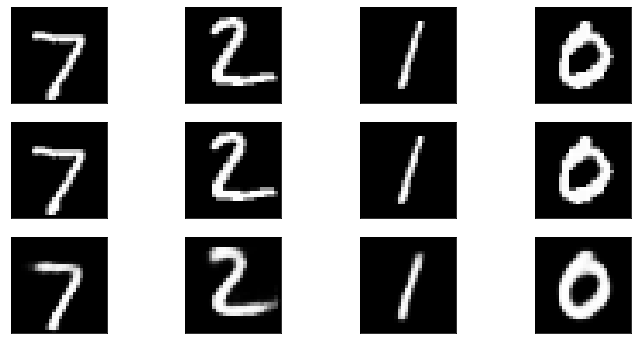

313/313 [==============================] - 1s 2ms/step
Noise: 0.2


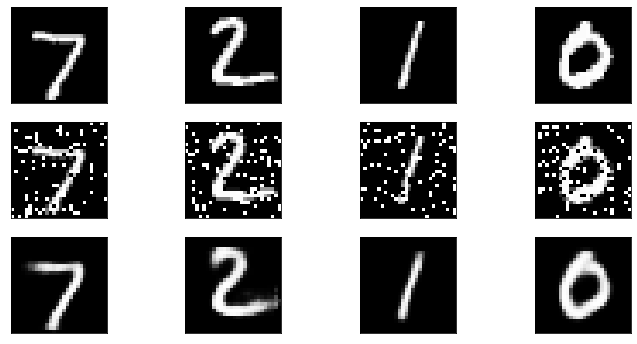

313/313 [==============================] - 1s 2ms/step
Noise: 0.4


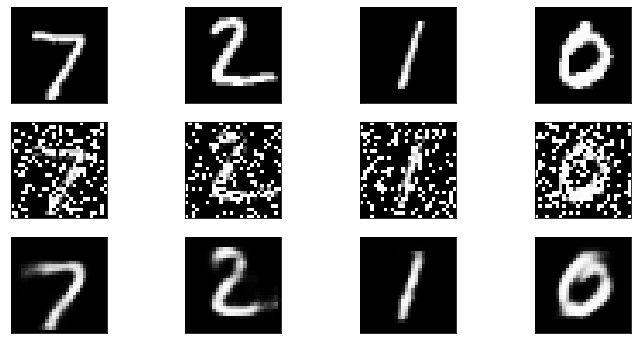

313/313 [==============================] - 1s 2ms/step
Noise: 0.6


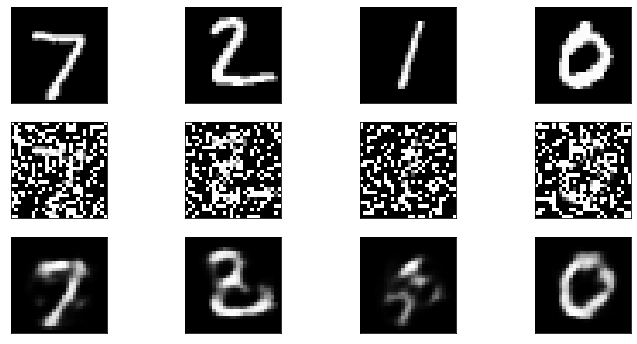

313/313 [==============================] - 1s 2ms/step
Noise: 0.8


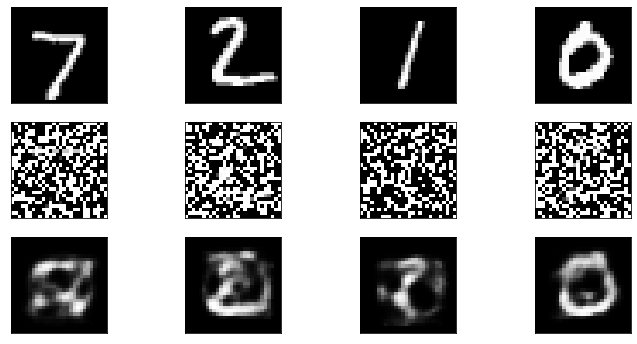

313/313 [==============================] - 1s 2ms/step
Noise: 1


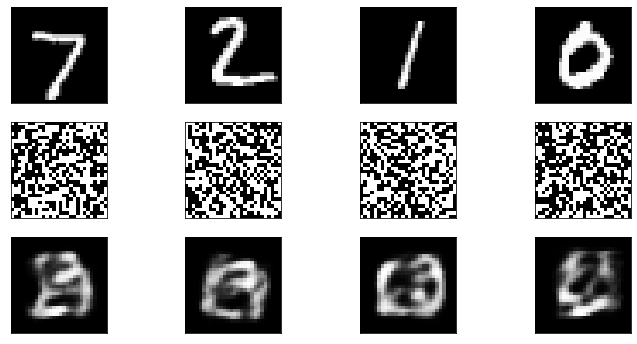

In [24]:
noise = [0, 0.2, 0.4, 0.6, 0.8, 1]

n = 4  # number of digits to display

for j in range (6):
    # Creating noise on the images
    flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise[j])

    # Decoding the noised images
    denoised_images = autoencoder.predict(flattened_x_test_seasoneed)

    print(f"Noise: {noise[j]}")

    # change plot figure size
    plt.rcParams["figure.figsize"] = (12, 6)
    image_index = random.sample(range(1, len(flattened_x_test_seasoneed)), n)
    for i in range(n):
        index = image_index[i]
        # Display original
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display seasoned
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(flattened_x_test_seasoneed[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display denoised
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(denoised_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

At noise level 0.6, it becomes hard for us to identify what digit an image represents, but the autoencoder is still somewhat helpful at this stage. However, at the noise levels of 0.8 and 1, the decoded images do not show the actual number and can be said to the levels where the autoencoder stops working.

### C) Test whether denoising improves the classification with the best performing model you obtained in questions 2 or 3. Plot the true-positive rate as a function of noise-level for the seasoned and denoised datasets – assume that the correct classification is the most likely class-label. Discuss your results.

In [25]:
# Load the best model from Question 3
model_loaded = keras.models.load_model("models/best_model_3", compile = True)

noises = np.linspace(0, 1, 20)

scores_denoised = []
scores_seasoned = []
for noise in noises:
    # creating noise on the images
    flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise)

    # decoding the noised images
    denoised_images = autoencoder.predict(flattened_x_test_seasoneed)

    # Reshaping the denoised images and the test images to fit the loaded model
    denoised_images_reshaped = denoised_images.reshape(len(denoised_images), 28, 28, 1)
    scores_denoised.append(model_loaded.evaluate(denoised_images_reshaped, y_test, verbose = 0)[1])

    x_test_seasoneed = flattened_x_test_seasoneed.reshape(len(flattened_x_test_seasoneed), 28, 28, 1)
    scores_seasoned.append(model_loaded.evaluate(x_test_seasoneed, y_test, verbose = 0)[1])

313/313 [==============================] - 1s 3ms/step


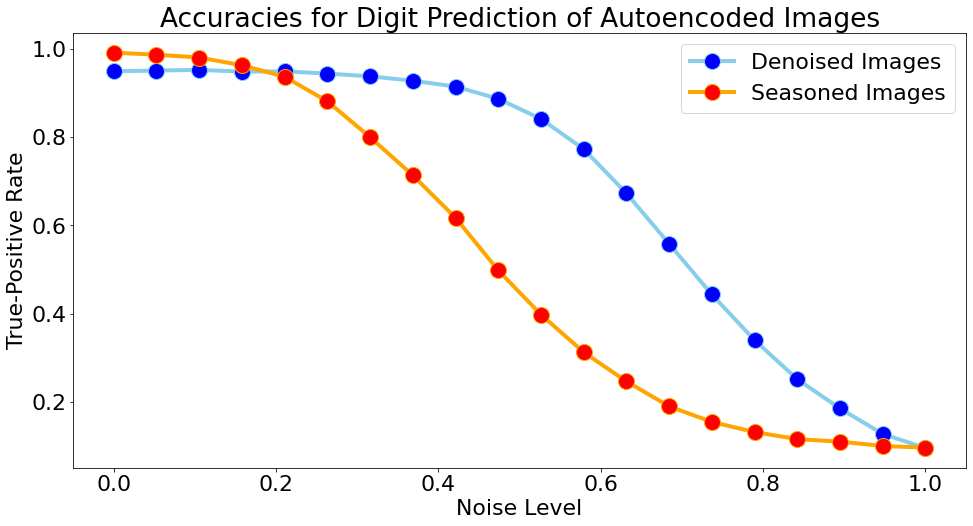

In [26]:
# set figure size
plt.rcParams["figure.figsize"] = (16, 8)

# Plot a line chart for training set accuracy
plt.plot(
    noises, 
    scores_denoised,
    color = "skyblue", 
    marker = "o", 
    markerfacecolor = "blue", 
    markersize = 16, 
    linewidth = 4,
    label = 'Denoised Images'
)

# Plot a line chart for validation set accuracy
plt.plot(
    noises, 
    scores_seasoned,
    color = "orange", 
    marker = "o", 
    markerfacecolor = "red", 
    markersize = 16, 
    linewidth = 4,
    label = 'Seasoned Images'
)

# add plot title
plt.title("Accuracies for Digit Prediction of Autoencoded Images")

# add legend and labels
plt.legend(["Denoised Images", "Seasoned Images"], loc = "upper right")
plt.xlabel("Noise Level")
plt.ylabel("True-Positive Rate")

# show the plot
plt.show()

When we plot the true-positive rate as a function of the noise level, we get something that looks like an inverted and shifted sigmoid curve. The true-positive rate is relatively high until a noise level of 0.4 is reached when applying the autoencoder before evaluating the model from question 3. The function exhibits a significant fall at a noise level of 0.6 due to the high degree of noise stated in question 4B; even the human eye has difficulty distinguishing which digit the image represents.

Assume the autoencoder is not utilised, and the model directly assesses the images with noise. The true-positive rate is much lower, especially in the range of 0.2 to 0.8, indicating that autoencoders can eliminate noise and improve image evaluation.

The true-positive rate for both noised and denoised photos is close to zero for a noise level of 1 because very little of the original image is maintained, but all pixels are set randomly.

The seasoned images have a greater true-positive rate than the denoised images at a noise level of 0, indicating that the autoencoder is a trained model that can make mistakes. Denoising photos with no noise can result in less clear digits than when the image is used directly.

### D) Explain how you can use the decoder part of the denoising auto-encoder to generate synthetic “hand-written” digits? – Describe the procedure and show examples in your report.

When compressing an image, the compressed data points are stored as a vector defining the image's features, lowering the image's dimensions. The autoencoder's encoder transforms the image into a latent space representation. Because the features are compressed in this latent space, comparable data is clustered and can be modified to make the image look different from the original.

A new image can be formed by interpolating this latent space, and a perfect digit can be reconstructed as a not-so-perfect digit that seems handwritten. The encoder compresses the image, then resets the vectors to a value between the two images used for interpolation (the function "interpolate" below), and finally decodes the image - see code below. The decoder is now utilised to recreate the image from the latent space with some adjusted characteristics. It is also feasible to employ images representing different numbers, resulting in more variance in the images and images where the human eye cannot distinguish between two different numbers. On the other hand, the model trained above will always classify the image as a digit.

Another method for producing handwritten numbers is to add noise to the image and then run it through the autoencoder, as described in the subquestions above. Even if the source image were a flawless digit, the autoencoder would output slightly different digits by adding some random noise. As a result, the noise + autoencoder will replicate human behaviour because no two digits will be identical. See the photos above for an example of how we compressed and uncompressed the digits using various noise levels (4B).